# Deep Learning Assignment 1 Part A
Name: Rejey Ezekiel <br>
Admin Number: 2348935 <br>
Class: DAAA/FT/2A/01

<hr>

## Initialise Libraries and Variables

In [1]:
# pip install keras_tuner
# %pip install pydot

In [2]:
from pathlib import Path
import os
import keras
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# %pip install scikit-learn
from sklearn.model_selection import train_test_split
from pathlib import Path
# %pip install matplotlib
import matplotlib.pyplot as plt
import glob
import random
from PIL import Image
import numpy as np
import seaborn as sns

# Larger CNN Model
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Normalization
from keras.models import Model  # Import Model class
from keras.layers import Input, Dense, Flatten
from keras.optimizers import SGD  # Import optimizer if not already imported
from tensorflow.keras.layers import BatchNormalization
from sklearn import preprocessing
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

## Loading the Image Datasets

In [3]:
# Specify the path to dataset
trainPath = 'Dataset for CA1 part A - AY2425S1/train'
validationPath = 'Dataset for CA1 part A - AY2425S1/validation'
testPath = 'Dataset for CA1 part A - AY2425S1/test'

In [4]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)  # normalize pixel values to the range [0, 1]

# Define the batch size
batch_size = 32
target_size = (224, 224)

# Create a generator for training data
print("Train Dataset:")
train = datagen.flow_from_directory(
    trainPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Create a generator for validation data
print("\nValidation Dataset:")
validation = datagen.flow_from_directory(
    validationPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

# Create a generator for test data
print("\nTest Dataset:")
test = datagen.flow_from_directory(
    testPath,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
)

Train Dataset:
Found 9043 images belonging to 15 classes.

Validation Dataset:
Found 3000 images belonging to 15 classes.

Test Dataset:
Found 3000 images belonging to 15 classes.


In [5]:
# Create an ImageDataGenerator for grayscale images and normalization
datagen_grayscale_37 = ImageDataGenerator(rescale=1./255)  # normalize pixel values to the range [0, 1]

# Define the batch size
batch_size = 32

# Create a generator for training data with input size 37 by 37
print("Train Dataset - 37x37:")
train_37x37 = datagen_grayscale_37.flow_from_directory(
    trainPath,
    target_size=(37, 37),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale,
    seed=42
)

# Create a generator for validation data with input size 37 by 37
print("\nValidation Dataset - 37x37:")
validation_37x37 = datagen_grayscale_37.flow_from_directory(
    validationPath,
    target_size=(37, 37),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale
)

# Create a generator for test data with input size 37 by 37
print("\nTest Dataset - 37x37:")
test_37x37 = datagen_grayscale_37.flow_from_directory(
    testPath,
    target_size=(37, 37),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale
)

Train Dataset - 37x37:
Found 9043 images belonging to 15 classes.

Validation Dataset - 37x37:
Found 3000 images belonging to 15 classes.

Test Dataset - 37x37:
Found 3000 images belonging to 15 classes.


In [6]:
# Create an ImageDataGenerator for grayscale images and normalization
datagen_grayscale_131 = ImageDataGenerator(rescale=1./255)  # normalize pixel values to the range [0, 1]

# Create a generator for training data with input size 131 by 131
print("Train Dataset - 131x131:")
train_131x131 = datagen_grayscale_131.flow_from_directory(
    trainPath,
    target_size=(131, 131),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale
    seed=42
)

# Create a generator for validation data with input size 131 by 131
print("\nValidation Dataset - 131x131:")
validation_131x131 = datagen_grayscale_131.flow_from_directory(
    validationPath,
    target_size=(131, 131),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale
)

# Create a generator for test data with input size 131 by 131
print("\nTest Dataset - 131x131:")
test_131x131 = datagen_grayscale_131.flow_from_directory(
    testPath,
    target_size=(131, 131),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',  # convert to grayscale
)

Train Dataset - 131x131:
Found 9043 images belonging to 15 classes.

Validation Dataset - 131x131:
Found 3000 images belonging to 15 classes.

Test Dataset - 131x131:
Found 3000 images belonging to 15 classes.


### Viewing the raw data (224 x 224)

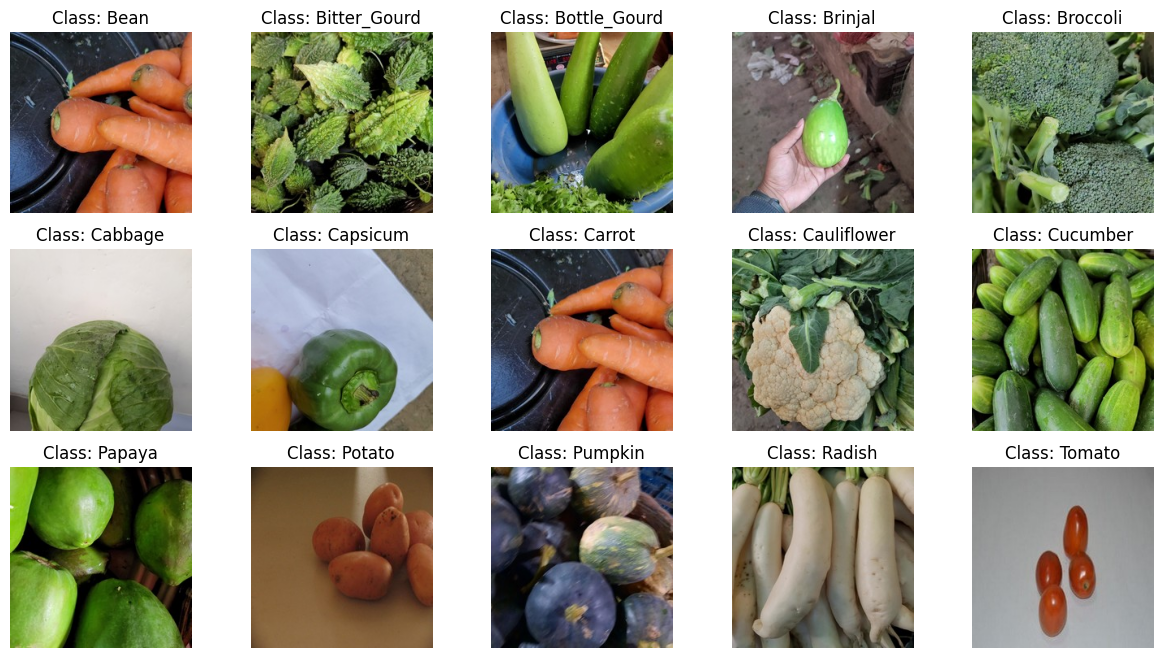

In [7]:
# Visualize one image for each subfolder in the training dataset
def visualize_one_image_per_subfolder(generator, base_path):
    # Get the list of subfolders (classes)
    subfolders = sorted(os.listdir(base_path))
    
    # Plot one image for each subfolder
    plt.figure(figsize=(15, 8))
    for i, subfolder in enumerate(subfolders):
        class_path = os.path.join(base_path, subfolder)
        
        # Get the list of images in the current subfolder
        image_files = os.listdir(class_path)
        
        # Choose the first image from the subfolder
        if len(image_files) > 0:
            image_path = os.path.join(class_path, image_files[0])
            img = Image.open(image_path)
            plt.subplot(3, 5, i + 1)
            plt.imshow(img)
            plt.title(f"Class: {subfolder}")
            plt.axis('off')
    
    plt.show()

# Visualize one image for each subfolder in the training dataset
visualize_one_image_per_subfolder(train, trainPath)

37x37


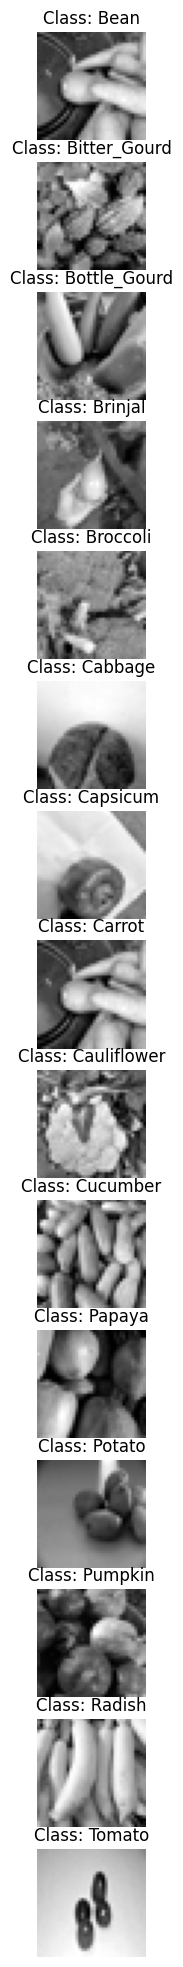

131x131


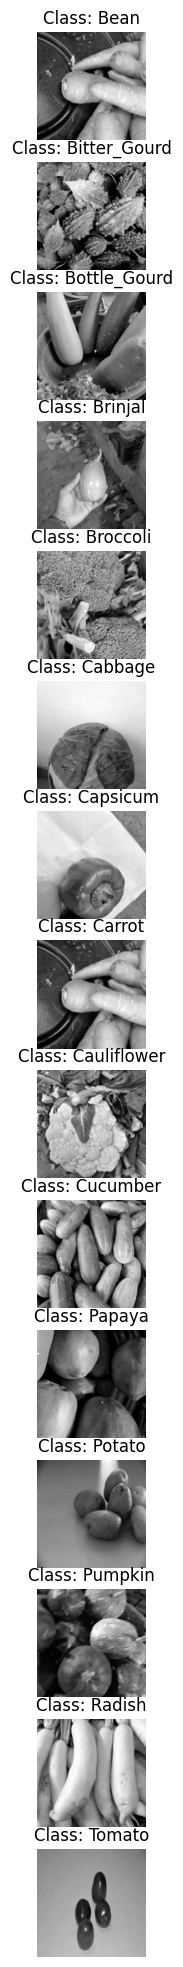

In [8]:
# Visualize 10 grayscale images for each subfolder in the training dataset
def visualize_10_images_per_subfolder(generator, base_path, images_per_subfolder=1, target_size=(128, 128)):
    # Get the list of subfolders (classes)
    subfolders = sorted(os.listdir(base_path))
    
    # Plot 10 images for each subfolder
    plt.figure(figsize=(25, 25))
    for i, subfolder in enumerate(subfolders):
        class_path = os.path.join(base_path, subfolder)
        
        # Get the list of images in the current subfolder
        image_files = os.listdir(class_path)
        
        # Choose the first 10 images from the subfolder
        for j in range(min(images_per_subfolder, len(image_files))):
            image_path = os.path.join(class_path, image_files[j])
            
            # Open the image and convert to grayscale
            img = Image.open(image_path).convert('L')
            
            # Resize the image to the specified target size without antialiasing
            img = img.resize(target_size)
            
            plt.subplot(len(subfolders), images_per_subfolder, i * images_per_subfolder + j + 1)
            plt.imshow(img, cmap='gray')
            plt.title(f"Class: {subfolder}")
            plt.axis('off')
    
    plt.show()

# Visualize 10 grayscale images (31x31) for each subfolder in the training dataset
print('37x37')
visualize_10_images_per_subfolder(train, trainPath, images_per_subfolder=1, target_size=(37, 37))

# Visualize 10 grayscale images (128x128) for each subfolder in the training dataset
print('131x131')
visualize_10_images_per_subfolder(train, trainPath, images_per_subfolder=1, target_size=(131, 131))

In [9]:
# Class labels
class_labels = {
    0: 'Bean',
    1: 'Bitter_Gourd',
    2: 'Bottle_Gourd',
    3: 'Brinjal',
    4: 'Broccoli',
    5: 'Cabbage',
    6: 'Capsicum',
    7: 'Carrot',
    8: 'Cauliflower',
    9: 'Cucumber',
    10: 'Papaya',
    11: 'Potato',
    12: 'Pumpkin',
    13: 'Radish',
    14: 'Tomato'
}

class_count = len(class_labels)
print(class_count)

15


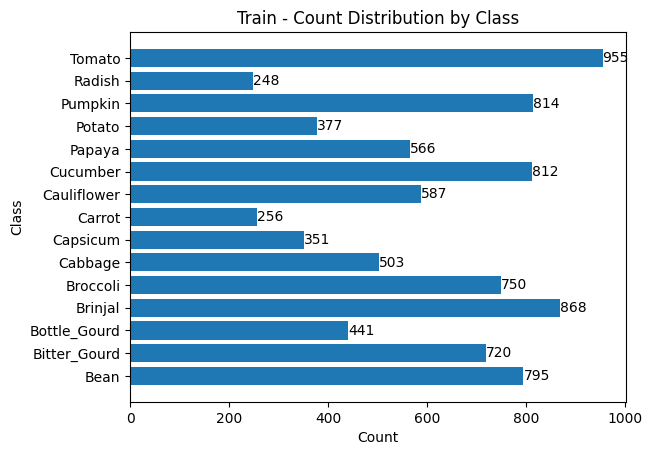

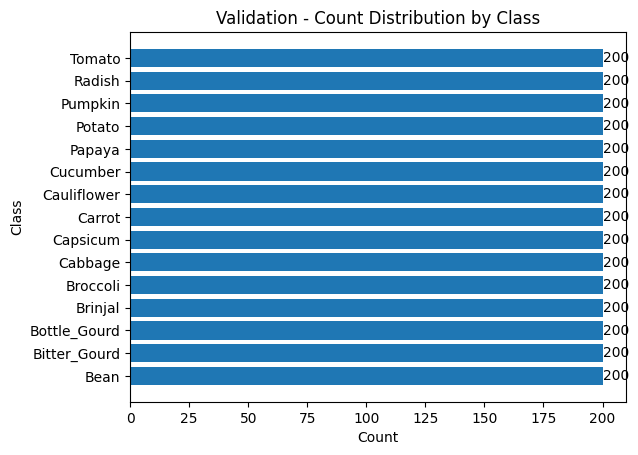

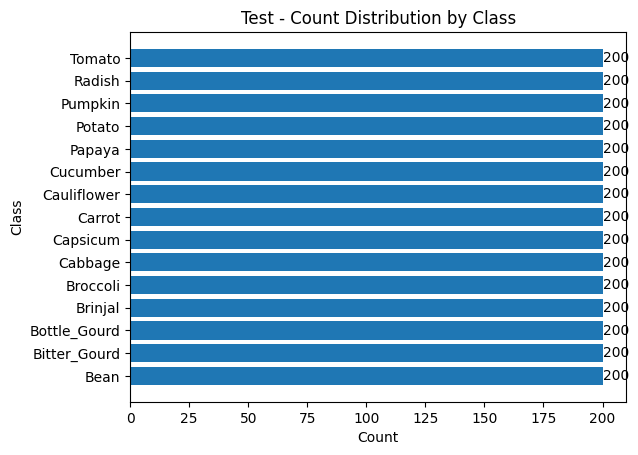

In [10]:
def visualize_class_distribution(data_generator, class_labels, dataset_type):

    # Get the class labels from the generator
    labels = data_generator.classes
    
    # Calculate the class counts
    unique_labels, counts = np.unique(labels, return_counts=True)
    
    # Create a horizontal bar chart with labels
    plt.barh(unique_labels, counts, tick_label=[class_labels[label] for label in unique_labels])
    
    # Add labels to the chart
    plt.xlabel('Count')
    plt.ylabel('Class')
    plt.title(f'{dataset_type} - Count Distribution by Class')

    # Display the count of each class on the chart
    for i, count in enumerate(counts):
        plt.text(count, i, str(count), ha='left', va='center')

    # Show the chart
    plt.show()

# Titles for different datasets
visualize_class_distribution(train, class_labels, 'Train')
visualize_class_distribution(validation, class_labels, 'Validation')
visualize_class_distribution(test, class_labels, 'Test')

### Data Augmentation

In [11]:
def data_augmentation(x_train, img_size):
    imageArr = []

    for images in x_train:
        images = images.reshape(img_size, img_size, 1)

        # Augmentations for both sizes
        image = tf.image.random_flip_left_right(images)
        image = tf.image.random_flip_up_down(image)
        # Random rotation between 0 and 360 degrees
        angle = tf.random.uniform(shape=[], minval=0, maxval=360, dtype=tf.float32)
        rotated_image = tf.image.rot90(images, k=tf.cast(angle // 90, dtype=tf.int32))

        imageArr.append(tf.reshape(rotated_image, (img_size, img_size)))

    return np.array(imageArr)


In [12]:
batch_of_37x37_images, batch_of_37x37_labels = train_37x37.next()
augmented_37x37 = data_augmentation(batch_of_37x37_images, img_size=37)
labels_37x37 = np.argmax(batch_of_37x37_labels, axis=1)

In [13]:
batch_of_131x131_images, batch_of_131x131_labels = train_131x131.next()
augmented_131x131 = data_augmentation(batch_of_131x131_images, img_size=131)
labels_131x131 = np.argmax(batch_of_131x131_labels, axis=1)

In [14]:
print(f"Shape after Augmentation (37): {augmented_37x37.shape}")
print(f"Shpae after Augmentation (131): {augmented_131x131.shape}")

Shape after Augmentation (37): (32, 37, 37)
Shpae after Augmentation (131): (32, 131, 131)


In [15]:
def visualize_augmented_images(original_images, augmented_images, labels, class_labels, num_images=5):
    plt.figure(figsize=(15, 6))

    for i in range(num_images):
        # Display original image with label
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original_images[i].reshape(original_images.shape[1], original_images.shape[2]), cmap='gray')
        plt.title(f'Original\nLabel: {class_labels[labels[i]]}')
        plt.axis('off')

        # Display augmented image with label
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(augmented_images[i].reshape(original_images.shape[1], original_images.shape[2]), cmap='gray')
        plt.title(f'Augmented\nLabel: {class_labels[labels[i]]}')
        plt.axis('off')

    plt.show()

37x37


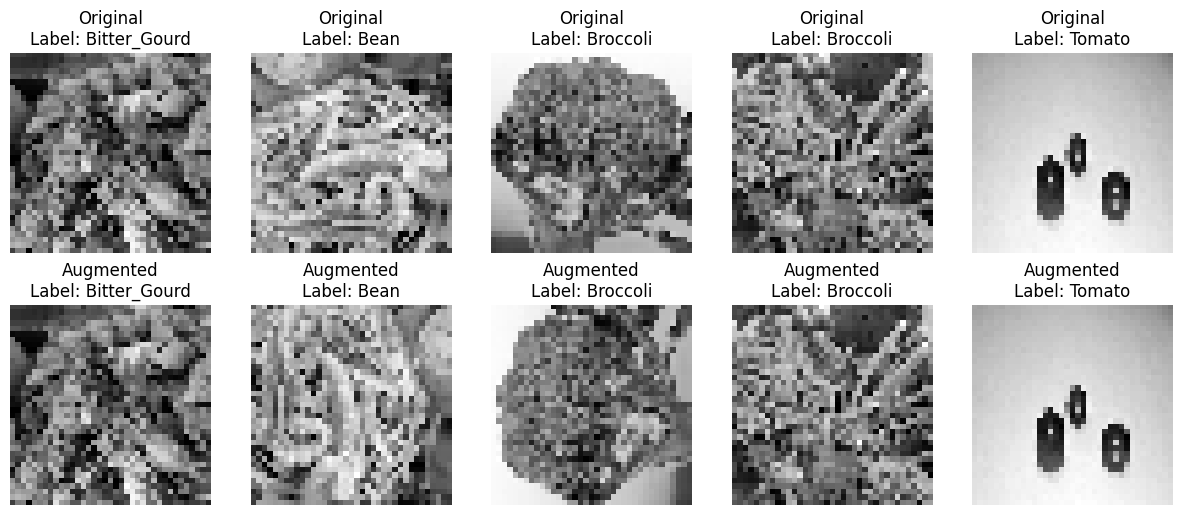

131x131


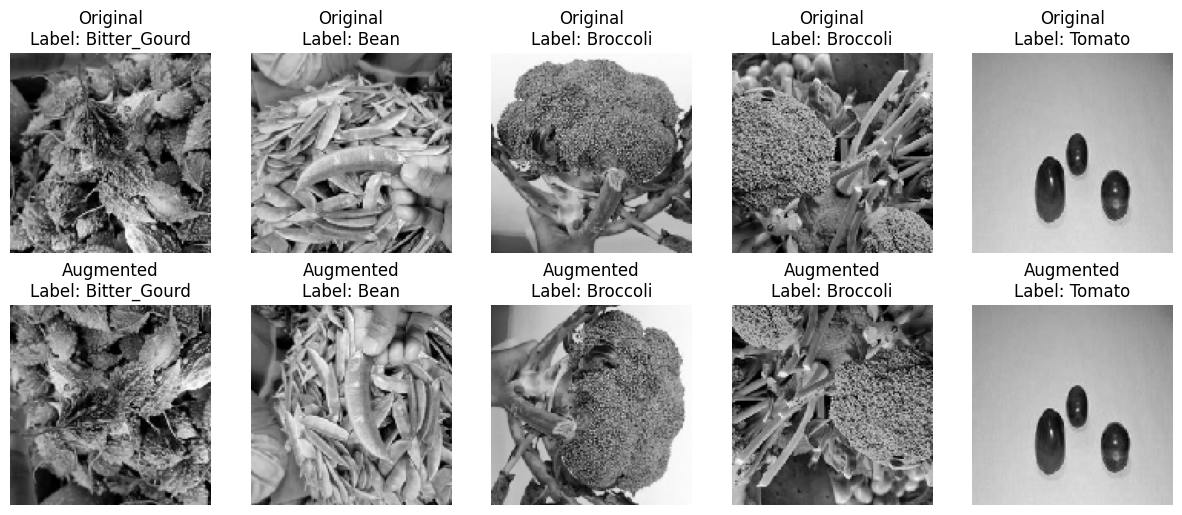

In [16]:
print('37x37')
visualize_augmented_images(batch_of_37x37_images, augmented_37x37, labels_37x37, class_labels, num_images=5)
print('131x131')
visualize_augmented_images(batch_of_131x131_images, augmented_131x131, labels_131x131, class_labels, num_images=5)

In [17]:
batch_of_images_37x37, batch_of_labels_37x37 = next(train_37x37)
batch_of_images_131x131, labels_131x131 = next(train_131x131)

In [18]:
# augmented_37x37_images is initially (32, 31, 31)
# Add an extra dimension to represent the color channel
augmented_37x37_images = np.expand_dims(augmented_37x37, axis=-1)

# augmented_131x131_images is initially (32, 128, 128)
# Add an extra dimension to represent the color channel
augmented_131x131_images = np.expand_dims(augmented_131x131, axis=-1)


# Now the shape should be (32, 128, 128, 1)
print("Shape of augmented_37x37_images:", augmented_37x37_images.shape)

# Now the shape should be (32, 128, 128, 1)
print("Shape of augmented_131x131_images:", augmented_131x131_images.shape)


Shape of augmented_37x37_images: (32, 37, 37, 1)
Shape of augmented_131x131_images: (32, 131, 131, 1)


In [19]:
# Concatenate data augmentation dataset with original dataset
train_aug_37 = np.concatenate((batch_of_images_37x37, augmented_37x37_images), axis=0)
train_aug_131 = np.concatenate((batch_of_images_131x131, augmented_131x131_images), axis=0)

In [20]:
train_label = []
num_batches = 100  
for i, (img, label) in enumerate(train):
    train_label.extend(tf.argmax(label, axis=1).numpy())
    if i == num_batches:
        break


train_label = np.array(train_label)
class_names = np.unique(train_label)

class_weights = compute_class_weight(class_weight='balanced', classes=class_names, y=train_label)
class_weights = dict(zip(class_names, class_weights))
print(class_weights)

{0: 0.7750599520383693, 1: 0.8584329349269588, 2: 1.3383022774327122, 3: 0.706448087431694, 4: 0.792156862745098, 5: 1.1970370370370371, 6: 1.8106442577030812, 7: 2.8350877192982455, 8: 0.9975308641975309, 9: 0.7353811149032992, 10: 1.0993197278911564, 11: 1.7517615176151762, 12: 0.7695238095238095, 13: 2.0327044025157233, 14: 0.573049645390071}


<h1>Utility Functions / Variable</h1>
<br>
<h3>Learning Curve Plotting Function</h3>

In [21]:
sns.set_palette('Set2')
sns.set(font="Century Gothic")
sns.set("notebook")

def plot_loss_curve(history):
    history = pd.DataFrame(history)
    epochs = list(range(1, len(history) + 1))
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    plt.title("Plot Loss Curve")
    plt.scatter(epochs, history["loss"])
    plt.plot(epochs, history["loss"], label="Training Loss")
    plt.scatter(epochs, history["val_loss"])
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.scatter(epochs, history["accuracy"])
    plt.plot(epochs, history["accuracy"], label="Training Accuracy")
    plt.scatter(epochs, history["val_accuracy"])
    plt.plot(epochs, history["val_accuracy"], label="Validation Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

In [22]:
# Initialize an empty DataFrame
Model_Results = pd.DataFrame()

# Assuming baseModelHistory is a dictionary with history data
def Update_Models(History,Name,Batch_size):
    global Model_Results
    History = History.history

    print(History)
    
    # Find the index of the best validation accuracy
    best_val_idx = np.argmax(History["val_accuracy"])

    # Result dictionary for the best epoch
    result = {
        'Model Name': Name,
        'epoch': len(History["loss"]),
        'Batch Size': Batch_size,
        'best_val_accuracy': History["val_accuracy"][best_val_idx],
        'best_val_loss': History["val_loss"][best_val_idx],
        'accuracy': History["accuracy"][best_val_idx],
        'loss': History["loss"][best_val_idx]
    }

    # Convert the result dictionary to a DataFrame and append it
    result_df = pd.DataFrame([result])
    Model_Results = pd.concat([Model_Results, result_df], ignore_index=True)


In [23]:
# Function to Plot Confusion Matrix:
def plot_confusion_matrix(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [24]:
# Function to Make Predictions on Test Dataset:
def make_predictions_and_evaluate(model, test_generator):
    # Make predictions on the test dataset
    predictions = model.predict(test_generator)

    # Evaluate the model on the test dataset
    evaluation = model.evaluate(test_generator)

    # Extract the loss and accuracy from the evaluation results
    test_loss = evaluation[0]
    test_accuracy = evaluation[1]

    # Calculate CNN error
    cnn_error = 1 - test_accuracy

    # Display the results
    print(f"Loss on Test Dataset: {test_loss}")
    print(f"Accuracy on Test Dataset: {test_accuracy}")
    print(f"CNN Error on Test Dataset: {cnn_error}")

    # return predictions, test_loss, test_accuracy, cnn_error


In [25]:
# Function to Display Images with True and Predicted Labels:
def display_images_with_labels(images, true_labels, predicted_labels):
    num_images = len(images)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {true_labels[i]}\nPredicted: {predicted_labels[i]}')
        plt.axis('off')
    plt.show()

In [26]:
total_samples = train.samples
num_batches_per_epoch = total_samples // batch_size

In [27]:
Input_Shape_37 = (37, 37, 1)
Input_Shape_131 = (131,131,1)

In [62]:
def BaseLine(Train_Model,Validation_Model,test,model_name,input_shape):
    # Create a new Sequential model
    baseline = Sequential(name=model_name)

    # Convolutional Layer
    baseline.add(Conv2D(64, (3, 3), input_shape=input_shape, activation='relu'))
    # Pooling layer
    baseline.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten the feature map
    baseline.add(Flatten())

    # # Fully connected layers
    baseline.add(Dense(64, activation='relu'))

    # baseline.add(Dropout(0.4))

    baseline.add(Dense(class_count, activation='softmax'))

    # Compile the model
    baseline.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

    # Print the model summary
    baseline.summary()

    # Fit model with original 37x37 train dataset
    baseline_hist = baseline.fit(Train_Model, validation_data=Validation_Model, epochs=100, verbose=1, callbacks=EarlyStopping(monitor='val_loss', patience=15))

    # save weights
    # baseline.save_weights(f'Model_Weights/{model_name}_Weights.h5')

    # # Save the entire model
    # baseline.save(f'Model_Weights/{model_name}_Model.h5')

    scores = baseline.evaluate(test)
    print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

    plot_loss_curve(baseline_hist.history)

    Update_Models(baseline_hist,model_name,None)

Model: "BaseLine_131x131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 129, 129, 64)      640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 flatten_16 (Flatten)        (None, 262144)            0         
                                                                 
 dense_32 (Dense)            (None, 64)                16777280  
                                                                 
 dense_33 (Dense)            (None, 15)                975       
                                                                 
Total params: 16,778,895
Trainable params: 16,778,895
Non-trainable params: 0
______________________________________

Epoch 1/100
283/283 [==============================] - 12s 39ms/step - loss: 2.5701 - accuracy: 0.1505 - val_loss: 2.6576 - val_accuracy: 0.1693
Epoch 2/100
283/283 [==============================] - 11s 39ms/step - loss: 2.3296 - accuracy: 0.2749 - val_loss: 2.3653 - val_accuracy: 0.2687
Epoch 3/100
283/283 [==============================] - 11s 40ms/step - loss: 2.1605 - accuracy: 0.3366 - val_loss: 2.2509 - val_accuracy: 0.2937
Epoch 4/100
283/283 [==============================] - 11s 40ms/step - loss: 1.9953 - accuracy: 0.3817 - val_loss: 2.1025 - val_accuracy: 0.3443
Epoch 5/100
283/283 [==============================] - 12s 41ms/step - loss: 1.8246 - accuracy: 0.4334 - val_loss: 1.9743 - val_accuracy: 0.3913
Epoch 6/100
283/283 [==============================] - 11s 40ms/step - loss: 1.6453 - accuracy: 0.4991 - val_loss: 1.8192 - val_accuracy: 0.4290
Epoch 7/100
283/283 [==============================] - 11s 40ms/step - loss: 1.4623 - accuracy: 0.5619 - val_loss: 1.5651 - val_ac

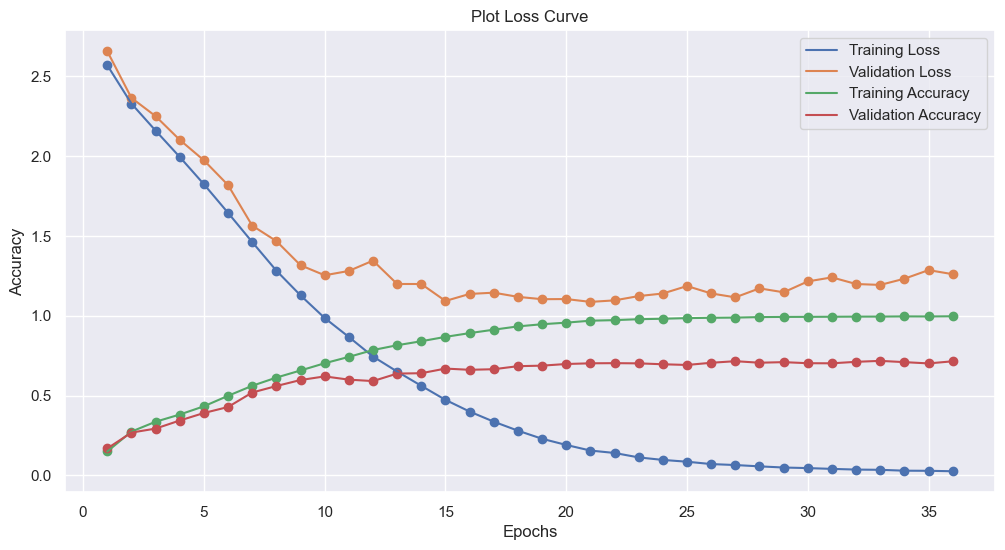

In [63]:
BaseLine(train_131x131,validation_131x131,test_131x131,"BaseLine_131x131",Input_Shape_131)

Model: "BaseLine_37x37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 35, 35, 64)        640       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 18496)             0         
                                                                 
 dense_34 (Dense)            (None, 64)                1183808   
                                                                 
 dense_35 (Dense)            (None, 15)                975       
                                                                 
Total params: 1,185,423
Trainable params: 1,185,423
Non-trainable params: 0
__________________________________________

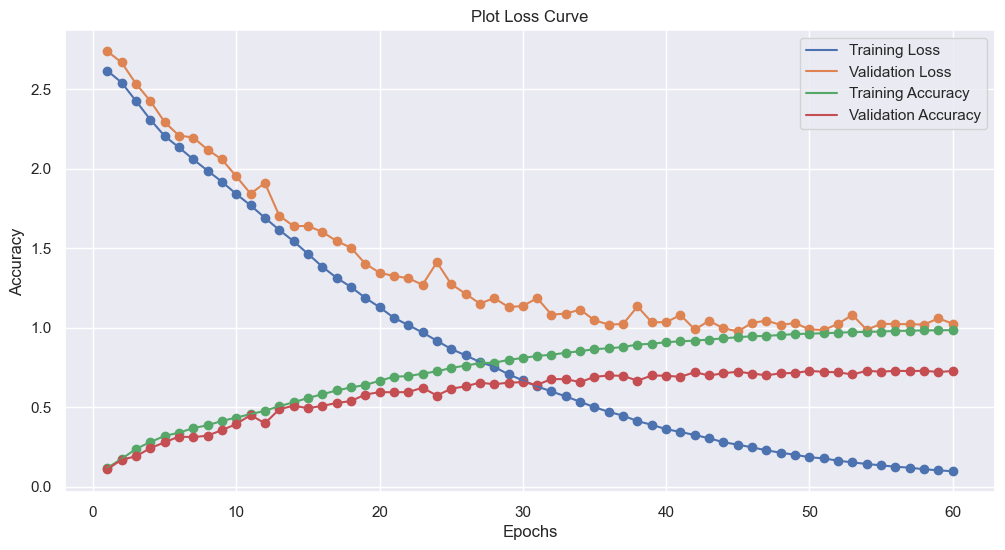

In [64]:
BaseLine(train_37x37,validation_37x37,test_37x37,"BaseLine_37x37",Input_Shape_37)

In [65]:
img_size_131 = (131, 131)

# Set up your ImageDataGenerator with desired augmentation parameters
datagen_grayscale_131_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=350,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

# Create a generator for your dataset with data augmentation
train_131x131_aug = datagen_grayscale_131_aug.flow_from_directory(
    trainPath,
    target_size=img_size_131,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    seed=42
)

Found 9043 images belonging to 15 classes.


Model: "BaseLine_131x131_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 129, 129, 64)      640       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 262144)            0         
                                                                 
 dense_36 (Dense)            (None, 64)                16777280  
                                                                 
 dense_37 (Dense)            (None, 15)                975       
                                                                 
Total params: 16,778,895
Trainable params: 16,778,895
Non-trainable params: 0
____________________________

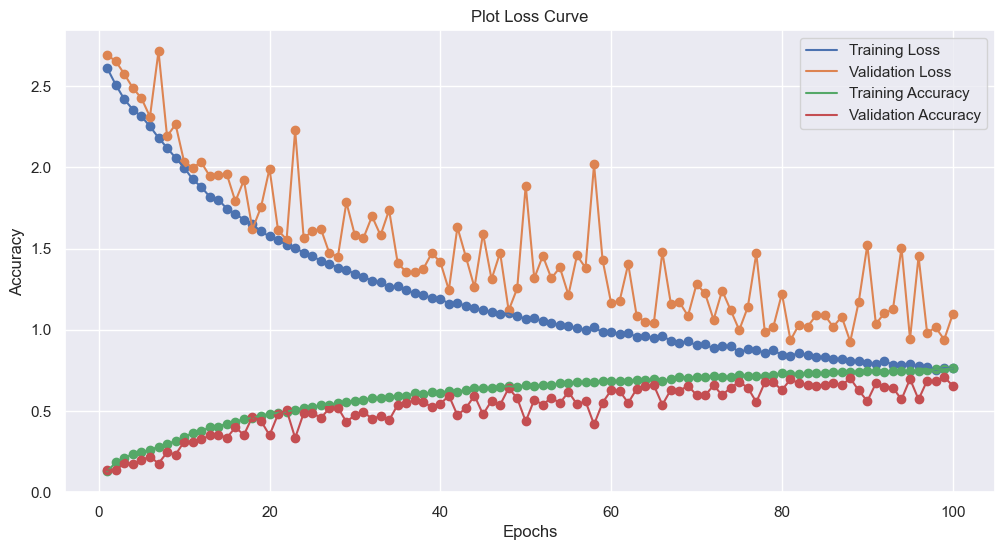

In [66]:
BaseLine(train_131x131_aug,validation_131x131,test_131x131,"BaseLine_131x131_Augmented",Input_Shape_131)

In [67]:
img_size_37 = (37, 37)

# Set up your ImageDataGenerator with desired augmentation parameters
datagen_grayscale_37_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=350,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
)

# Create a generator for your dataset with data augmentation
train_37x37_aug = datagen_grayscale_37_aug.flow_from_directory(
    trainPath,
    target_size=img_size_37,
    batch_size=batch_size,
    class_mode='categorical',
    color_mode='grayscale',
    seed=42
)

Found 9043 images belonging to 15 classes.


Model: "BaseLine_37x37_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 35, 35, 64)        640       
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 17, 17, 64)       0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 18496)             0         
                                                                 
 dense_38 (Dense)            (None, 64)                1183808   
                                                                 
 dense_39 (Dense)            (None, 15)                975       
                                                                 
Total params: 1,185,423
Trainable params: 1,185,423
Non-trainable params: 0
________________________________

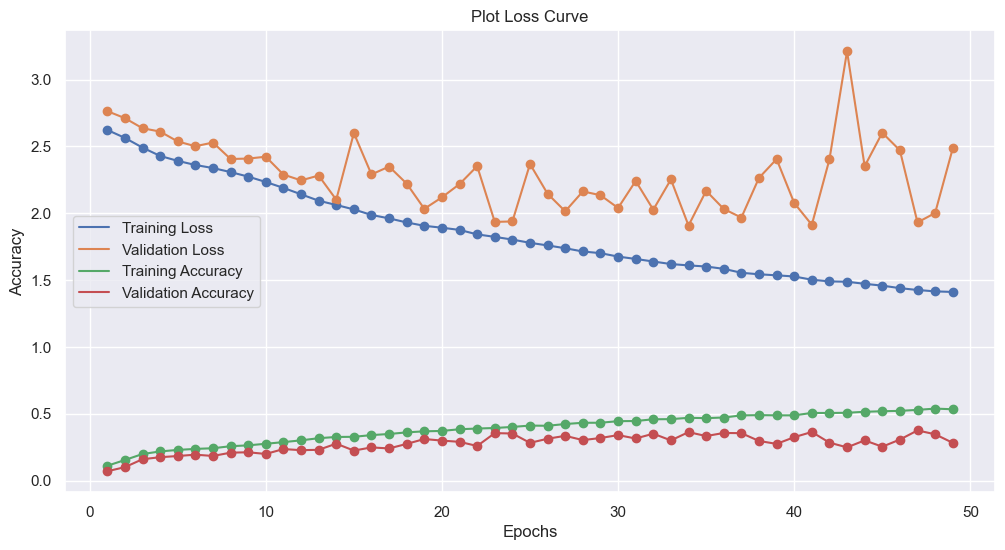

In [68]:
BaseLine(train_37x37_aug,validation_37x37,test_37x37,"BaseLine_37x37_Augmented",Input_Shape_37)

In [69]:
Model_Results

,Model Name,epoch,Batch Size,best_val_accuracy,best_val_loss,accuracy,loss
0,BaseLine_131x131,5,None,0.409000,1.785656,0.589391,1.219456
1,BaseLine_131x131,12,None,0.539667,1.730027,0.861219,0.469817
2,BaseLine_131x131,6,None,0.066667,2.711993,0.084043,3.027932
3,BaseLine_37x37,17,None,0.587000,1.405058,0.840650,0.553941
4,BaseLine_131x131,24,None,0.721333,1.091748,0.977331,0.115741
5,BaseLine_37x37_Augmented,27,None,0.458000,1.621708,0.492093,1.545226
6,BaseLine_37x37_Augmented,22,None,0.296000,2.196133,0.381289,1.855062
7,BaseLine_131x131_Augmented,97,None,0.704000,0.935699,0.725976,0.845408
8,BaseLine_37x37_Augmented,51,None,0.424667,1.753848,0.465111,1.611077
9,BaseLine_131x131,36,None,0.718000,1.193810,0.995356,0.035496


In [70]:
def SimpleConv(Train_Model,Validation_Model,test,model_name,input_shape):

    SimpleConv = Sequential(name=model_name)

    SimpleConv.add(Conv2D(32,(3,3), activation='relu',input_shape = input_shape))
    SimpleConv.add(MaxPooling2D(pool_size = (2,2)))

    SimpleConv.add(Conv2D(32,(3,3), activation='relu'))
    SimpleConv.add(MaxPooling2D(pool_size = (2,2)))

    SimpleConv.add(Dropout(0.4))

    SimpleConv.add(Flatten())

    SimpleConv.add(Dense(128, activation='relu'))

    SimpleConv.add(Dense(64, activation='relu'))

    SimpleConv.add(Dense(class_count, activation='softmax'))

    SimpleConv.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), metrics=['accuracy'])
   
    SimpleConv.summary()
   
    SimpleConv2DHistory = SimpleConv.fit(Train_Model,validation_data=Validation_Model, epochs=100, verbose=1, callbacks=EarlyStopping(monitor='val_loss', patience=5))
   
    SimpleConv.save_weights(f'Model_Weights/{model_name}_Weights.h5')
   
    # Save the entire model
    SimpleConv.save(f'Model_Weights/{model_name}_Model.h5')
   
     # from tensorflow.keras.utils import plot_model
    # tf.keras.utils.plot_model(baseline, show_shapes=True)   
    
    scores = SimpleConv.evaluate(test)
    
    print("CNN Error: %.2f%%" % (100 - scores[1] * 100))
    
    Update_Models(SimpleConv2DHistory,SimpleConv.name,None)
    
    plot_loss_curve(SimpleConv2DHistory.history)

Model: "SimpleConv_37x37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 35, 35, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 17, 17, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 15, 15, 32)        9248      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 7, 7, 32)          0         
                                                                 
 flatten_20 (Flatten)        (None, 1568)         

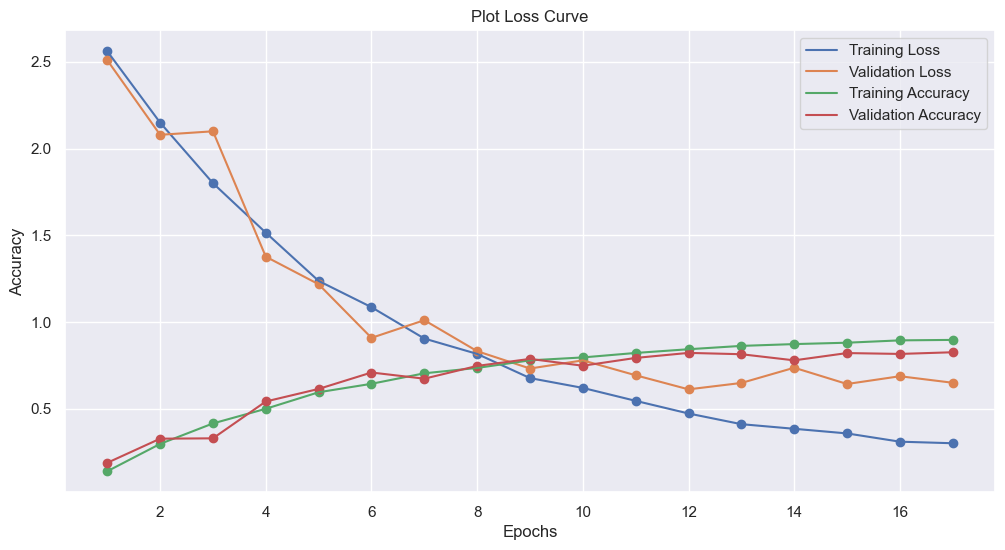

In [71]:
SimpleConv(train_37x37,validation_37x37,test_37x37,"SimpleConv_37x37",Input_Shape_37)

In [72]:
def conv2D_Model(train,validation,test,model_name,input_shape):
    conv2D = Sequential(name = model_name)

    conv2D.add(Conv2D(32,(3,3), padding="same", activation='relu',input_shape = input_shape))
    conv2D.add(MaxPooling2D(pool_size=(2,2)))
    conv2D.add(BatchNormalization())

    conv2D.add(Conv2D(64,(3, 3), activation='relu'))
    conv2D.add(MaxPooling2D(pool_size=(2, 2)))
    conv2D.add(BatchNormalization())

    conv2D.add(Conv2D(128,(3, 3), activation='relu'))
    conv2D.add(MaxPooling2D(pool_size=(2, 2)))
    conv2D.add(BatchNormalization())

    conv2D.add(Dropout(0.4))
    conv2D.add(Flatten())

    conv2D.add(Dense(256, activation = 'relu')) 
    conv2D.add(BatchNormalization())

    conv2D.add(Dense(128, activation = 'relu')) 
    conv2D.add(BatchNormalization())

    conv2D.add(Dense(84, activation = 'relu')) 
    conv2D.add(BatchNormalization())

    conv2D.add(Dense(64, activation = 'relu')) 
    conv2D.add(BatchNormalization())

    conv2D.add(Dense(class_count, activation ='softmax')) 

    conv2D.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                metrics=['accuracy'])
    conv2D.summary()
    tf.keras.utils.plot_model(conv2D, show_shapes=True)  

        # mon_val_acc = EarlyStopping(monitor='val_accuracy', patience=15)
    mon_val_loss = EarlyStopping(monitor='val_loss', patience=15)

    conv2D_history = conv2D.fit(train, validation_data=validation, epochs=100, verbose=1, callbacks = mon_val_loss)

    Update_Models(conv2D_history,conv2D.name,None)

    # Final evaluation of the model
    scores = conv2D.evaluate(test)
    print("CNN Error: %.2f%%" % (100 - scores[1] * 100))

    plot_loss_curve(conv2D_history.history) 


Model: "Conv2D_37x37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 37, 37, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization (BatchN  (None, 18, 18, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_23 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                                      

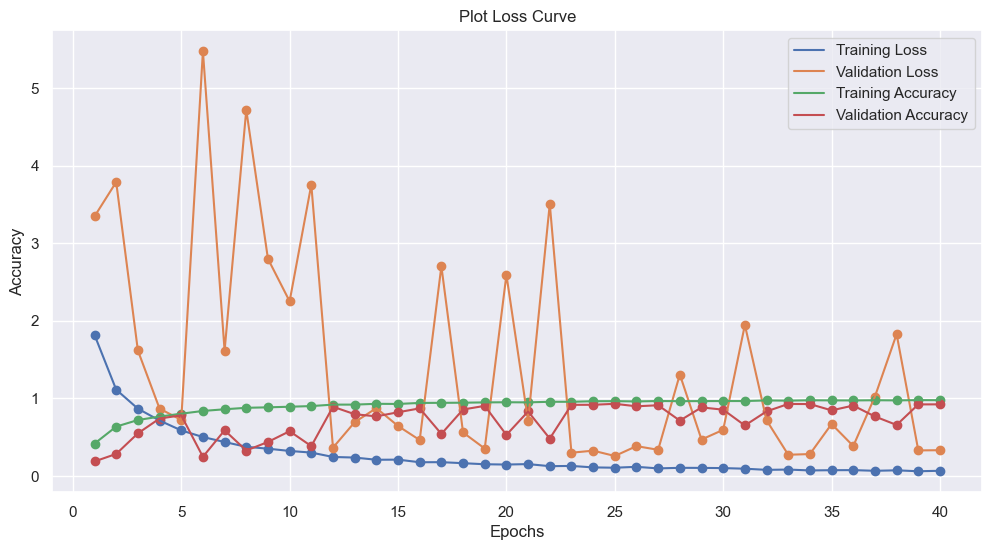

In [73]:
conv2D_Model(train_37x37,validation_37x37,test_37x37,"Conv2D_37x37",Input_Shape_37)

Model: "Conv2D_131x131"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 65, 65, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_7 (Batc  (None, 65, 65, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_26 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                    

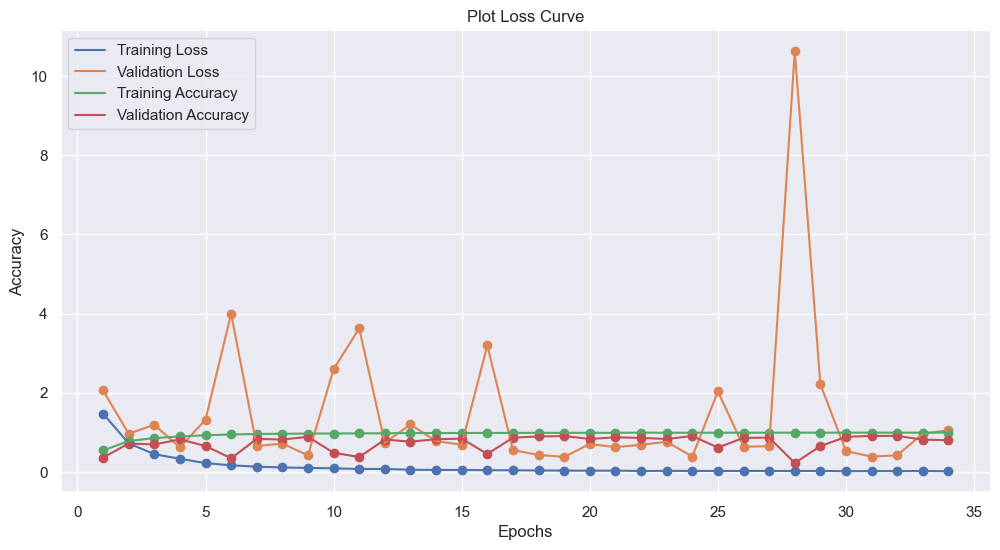

In [74]:
conv2D_Model(train_131x131,validation_131x131,test_131x131,"Conv2D_131x131",Input_Shape_131)

Model: "Conv2D_37x37_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 37, 37, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 18, 18, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_14 (Bat  (None, 18, 18, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                            
                                            

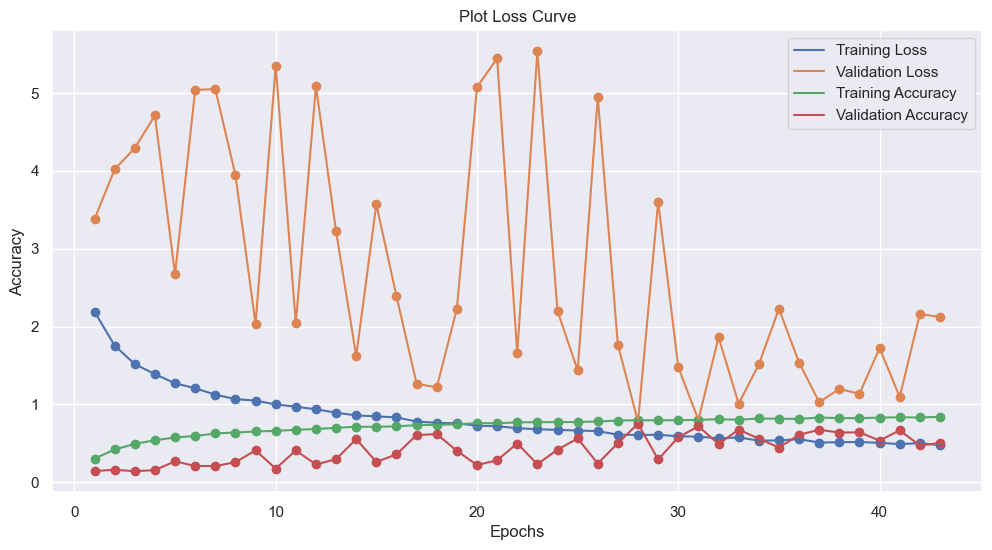

In [75]:
conv2D_Model(train_37x37_aug,validation_37x37,test_37x37,"Conv2D_37x37_Augmented",Input_Shape_37)

Model: "Conv2D_131x131_Augmented"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_31 (Conv2D)          (None, 131, 131, 32)      320       
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 65, 65, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_21 (Bat  (None, 65, 65, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_32 (Conv2D)          (None, 63, 63, 64)        18496     
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                          

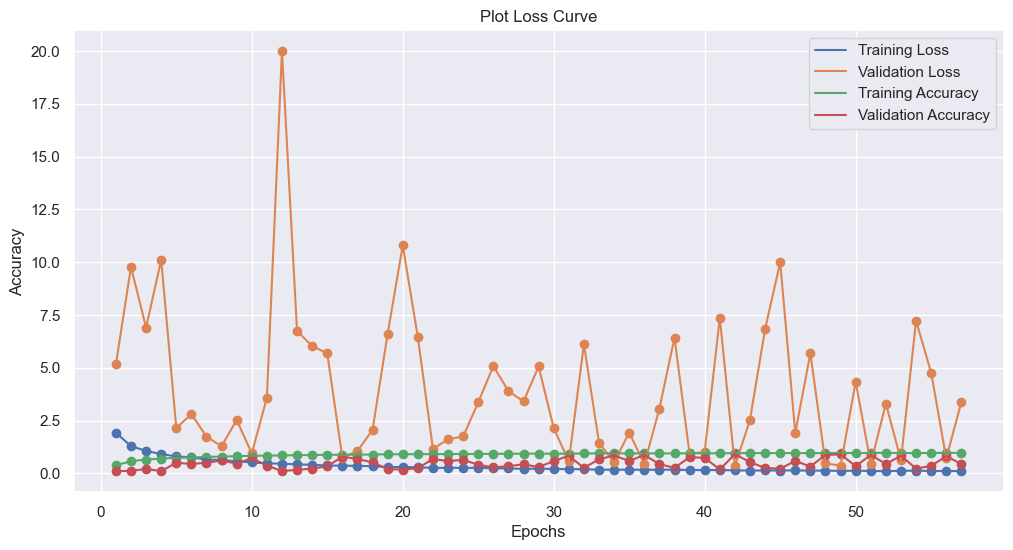

In [76]:
conv2D_Model(train_131x131_aug,validation_131x131,test_131x131,"Conv2D_131x131_Augmented",Input_Shape_131)

## Custom CNN Model

In [114]:
def Custom_CNN(Conv_Layer, Dense_Layer, Model_Name, num_filters=64):
    # Initialize a Sequential model
    model = Sequential(name = Model_Name)

    model.add(Conv2D(num_filters, (3,3), input_shape=(37,37,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Add convolutional layers
    for _ in range(Conv_Layer):
        model.add(Conv2D(num_filters, (3,3), activation='relu'))
        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.3))
    
    # Flatten the output of the last convolutional layer
    model.add(Flatten())
    
    # Add dense layers
    for _ in range(Dense_Layer):
        model.add(Dense(256, activation='relu'))
    
    # Output layer
    model.add(Dense(15, activation='softmax'))
    
    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [115]:
# Define the number of convolutional and dense layers to experiment with
num_conv_layers_list = [2, 3, 4, 5]
num_dense_layers_list = [1, 2, 3, 4]

best_accuracy = 0.0
best_loss = float('inf')
best_model_configuration = None

In [117]:
# Train and evaluate models with different configurations
for num_conv_layers in num_conv_layers_list:
    for num_dense_layers in num_dense_layers_list:
        for No,Model in enumerate([train_37x37,train_37x37_aug]):
            print(f"Number of Conv Layers: {num_conv_layers}, Number of Dense Layers: {num_dense_layers}")
            
            # Create the model with default values for num_filters and kernel_size
            model = Custom_CNN(num_conv_layers, num_dense_layers, 'train_37x37')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            hist = model.fit(train_37x37, validation_data=validation_37x37, epochs = 100, batch_size = 64, callbacks = [early_stopping], verbose=1)
            
            # Evaluate the model
            loss, accuracy = model.evaluate(test_37x37, verbose=0)
            print("Test Loss: %.4f, Test Accuracy: %.2f%%" % (loss, accuracy * 100)) # Print test accuracy

            Update_Models(hist,f'train_37x37_{num_dense_layers}_{num_conv_layers}',64)
            if No == 1:
                Update_Models(hist,f'train_37x37_Aug_{num_dense_layers}_{num_conv_layers}',64)


Number of Conv Layers: 2, Number of Dense Layers: 1
Epoch 1/100


283/283 [==============================] - 9s 29ms/step - loss: 2.3587 - accuracy: 0.2024 - val_loss: 2.0965 - val_accuracy: 0.3160
Epoch 2/100
283/283 [==============================] - 8s 28ms/step - loss: 1.9349 - accuracy: 0.3609 - val_loss: 1.8333 - val_accuracy: 0.4207
Epoch 3/100
283/283 [==============================] - 8s 29ms/step - loss: 1.6653 - accuracy: 0.4515 - val_loss: 1.6394 - val_accuracy: 0.4477
Epoch 4/100
283/283 [==============================] - 8s 28ms/step - loss: 1.4626 - accuracy: 0.5163 - val_loss: 1.3940 - val_accuracy: 0.5373
Epoch 5/100
283/283 [==============================] - 8s 30ms/step - loss: 1.3090 - accuracy: 0.5636 - val_loss: 1.2782 - val_accuracy: 0.5727
Epoch 6/100
283/283 [==============================] - 9s 30ms/step - loss: 1.1967 - accuracy: 0.6039 - val_loss: 1.0279 - val_accuracy: 0.6700
Epoch 7/100
283/283 [==============================] - 8s 30ms/step - loss: 1.0721 - accuracy: 0.6414 - val_loss: 0.9617 - val_accuracy: 0.6970
Epoc

In [ ]:
# Train and evaluate models with different configurations
for num_conv_layers in num_conv_layers_list:
    for num_dense_layers in num_dense_layers_list:
        for No,Model in enumerate([train_131x131,train_131x131_aug]):
            print(f"Number of Conv Layers: {num_conv_layers}, Number of Dense Layers: {num_dense_layers}")
            
            # Create the model with default values for num_filters and kernel_size
            model = Custom_CNN(num_conv_layers, num_dense_layers, 'train_131x131')

            early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

            # Train the model
            hist = model.fit(train_131x131, validation_data=validation_131x131, epochs = 100, batch_size = 64, callbacks = [early_stopping], verbose=1)
            
            # Evaluate the model
            loss, accuracy = model.evaluate(test_131x131, verbose=0)
            print("Test Loss: %.4f, Test Accuracy: %.2f%%" % (loss, accuracy * 100)) # Print test accuracy

            Update_Models(hist,f'train_131x131_{num_dense_layers}_{num_conv_layers}',64)
            
            if No == 1:
                Update_Models(hist,f'train_131x131_Aug_{num_dense_layers}_{num_conv_layers}',64)


In [ ]:
import winsound
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)


In [ ]:
winsound.Beep(2500, 1000)


In [ ]:
winsound.Beep(2500, 1000)


In [ ]:
winsound.Beep(2500, 1000)


In [ ]:
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)
winsound.Beep(2500, 1000)

In [ ]:
winsound.Beep(2500, 1000)
